In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp


In [2]:
#  Let’s check the first five entries of dataset. 

df = pd.read_csv('output.csv')
df.head(5)

,Unnamed: 0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,3,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,4,2,?,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [3]:
# removing index column
# The syntax inside iloc is [row selection, column selection].
df = df.iloc[:, 1:]

In [4]:
df.head(5)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [5]:
#  Defining headers for our dataset. 
headers = [
    "symboling", "normalized-losses", "make", 
           "fuel-type", "aspiration","num-of-doors",
           "body-style","drive-wheels", "engine-location",
           "wheel-base","length", "width","height", "curb-weight",
           "engine-type","num-of-cylinders", "engine-size", 
           "fuel-system","bore","stroke", "compression-ratio",
           "horsepower", "peak-rpm","city-mpg","highway-mpg","price"
]

df.columns = headers
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [6]:
data = df
# finding the missing values
data.isna().any()
# finding if missing values
data.isnull().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [7]:
# converting mpg to L / 100km
data['city-mpg'] = 235 / data['city-mpg']
data.rename(columns= {'city-mpg': 'city-L / 100km'}, inplace = True)

print(data.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L / 100km',
       'highway-mpg', 'price'],
      dtype='object')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [9]:
data.price.unique()

array(['16500', '13950', '17450', '15250', '17710', '18920', '23875', '?',
       '16430', '16925', '20970', '21105', '24565', '30760', '41315',
       '36880', '5151', '6295', '6575', '5572', '6377', '7957', '6229',
       '6692', '7609', '8558', '8921', '12964', '6479', '6855', '5399',
       '6529', '7129', '7295', '7895', '9095', '8845', '10295', '12945',
       '10345', '6785', '11048', '32250', '35550', '36000', '5195',
       '6095', '6795', '6695', '7395', '10945', '11845', '13645', '15645',
       '8495', '10595', '10245', '10795', '11245', '18280', '18344',
       '25552', '28248', '28176', '31600', '34184', '35056', '40960',
       '45400', '16503', '5389', '6189', '6669', '7689', '9959', '8499',
       '12629', '14869', '14489', '6989', '8189', '9279', '5499', '7099',
       '6649', '6849', '7349', '7299', '7799', '7499', '7999', '8249',
       '8949', '9549', '13499', '14399', '17199', '19699', '18399',
       '11900', '13200', '12440', '13860', '15580', '16900', '16695',


In [10]:
# Here it contains '?' so we drop it
data = data[data.price != '?']

# Changing Data type to int
#loc (Label-Based Indexing)

 #   Used for: Selecting rows and columns by their labels or boolean arrays.
 #  Works with: Row and column labels (names) rather than positions.

data.loc[:, 'price'] = data['price'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non-null

0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
199       Low
200    Medium
201    Medium
202    Medium
203    Medium
Name: price-binned, Length: 200, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


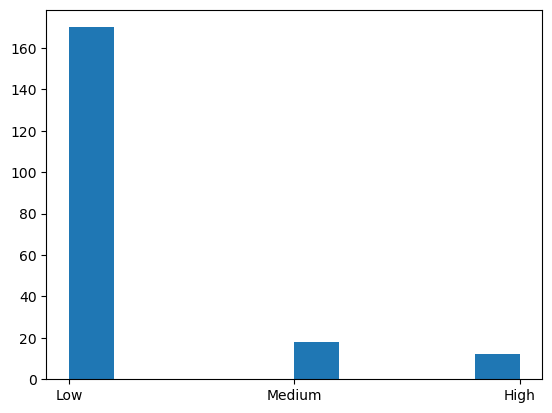

In [24]:
# Normalize the columns
data.loc[:, 'length'] = data['length'] / data['length'].max()
data.loc[:, 'width'] = data['width'] / data['width'].max()
data.loc[:, 'height'] = data['height'] / data['height'].max()

# Binning the 'price' column
bins = np.linspace(min(data['price']), max(data['price']), 4) 
group_names = ['Low', 'Medium', 'High']
data.loc[:, 'price-binned'] = pd.cut(data['price'], bins, labels=group_names, include_lowest=True)

# Plotting the binned price column
print(data['price-binned'])
plt.hist(data['price-binned'])
plt.show()


In [37]:
# categorical to numerical variables
pd.get_dummies(data['fuel-type']).head()

# descriptive analysis
# NaN are skipped

data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-L / 100km,highway-mpg
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,10.170100,9.937914,30.705000
std,1.248557,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,4.014163,2.539415,6.827227
min,-2.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,7.000000,4.795918,16.000000
25%,0.000000,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,8.575000,7.833333,25.000000
50%,1.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,9.000000,9.791667,30.000000
75%,2.000000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,9.400000,12.368421,34.000000
max,3.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,23.000000,18.076923,54.000000


In [39]:
# Plotting the data according to the price based on engine size.
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L / 100km,highway-mpg,price,price-binned
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500,Low
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500,Low
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950,Low
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450,Low
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500,12.368421,25,15250,Low


<Axes: xlabel='drive-wheels', ylabel='price'>

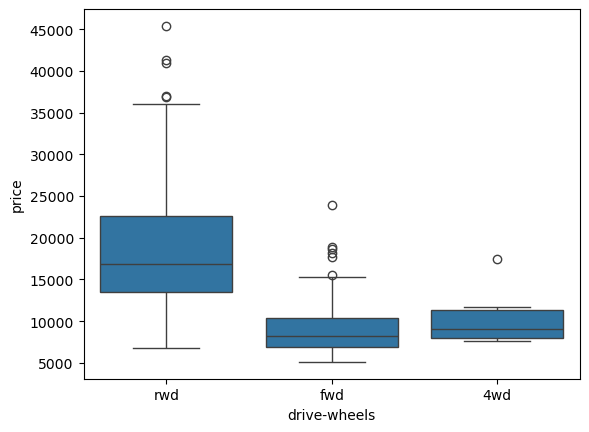

In [45]:

# by using seaborn

sns.boxplot(data = data , x = 'drive-wheels', y = 'price')

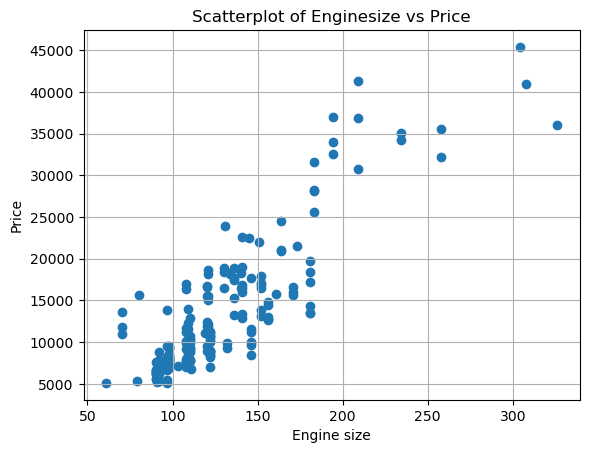

In [51]:
# Predicting price based on engine size
# Known on x and predictable on y

plt.scatter(data['engine-size'],data['price'])
plt.title('Scatterplot of Enginesize vs Price')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.grid()
plt.show()


In [53]:
# Grouping the data according to wheel, body-style and price. 
# Grouping Data
test = data[['drive-wheels', 'body-style', 'price']]
data_grp = test.groupby(['drive-wheels', 'body-style'], 
                         as_index = False).mean()

data_grp


,drive-wheels,body-style,price
0,4wd,hatchback,7603.0
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.75
3,fwd,convertible,11595.0
4,fwd,hardtop,8249.0
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.8
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.25
9,rwd,hardtop,24202.714286


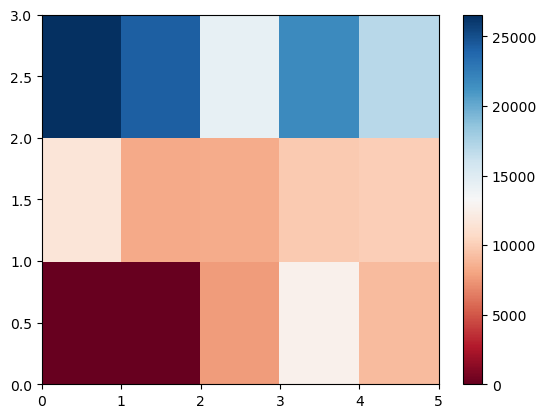

In [61]:
# Replace NaN values with 0
data_pivot = data_pivot.fillna(0)

# Use infer_objects to automatically convert object types to more specific types
data_pivot = data_pivot.infer_objects(copy=False)

# Visualize the pivoted data using a heatmap
plt.pcolor(data_pivot, cmap='RdBu')
plt.colorbar()
plt.show()
